## Preparing Packages and Loading Dataset 

In [1]:
import os

In [2]:
os.getcwd()

'c:\\Users\\marcg\\OneDrive\\Studium Hochschule\\Master\\2. Semester\\Adv Computer Vision\\advanced-computer-vision-ss2024_Gabler_Marc\\Advanced_Computer_Vision_Exercise_01\\Exercise_01\\source_code'

In [3]:
from sklearn import linear_model, metrics
import numpy
import csv

X_to_replace = [] 
Y_to_replace = []  

class FileFormatException(Exception):
    def __init__(self, line_number):
        super().__init__()
        self.line_number = line_number

def load_csv_in_sklearn_format( input_file_name ):
    features = []
    targets = []

    # Open the CSV file
    with open(input_file_name, 'r') as csvfile:
        # Create a CSV reader object specifying the delimiter as ";"
        csvreader = csv.reader(csvfile, delimiter=';')
        
        # Iterate over each row in the csv
        for row in csvreader:
            # Assuming the first column is the feature and the second is the target
            # Convert the string representations into the appropriate type (e.g., float)
            feature = float(row[0])
            target = float(row[1])
            
            # Append the current feature and target to their respective lists
            features.append([feature]) # Make it a 2D list to suit scikit-learn's expectations
            targets.append(target)
    
    return features, targets

# Example usage
# Replace 'path/to/your_file.csv' with the actual file path
# features, targets = import_csv_for_sklearn('path/to/your_file.csv')


In [4]:
x,y = load_csv_in_sklearn_format("non_linear_dataset_100.csv")

In [5]:
x,y

([[-94.93188225627813],
  [-93.62166058623542],
  [-93.15083406369698],
  [-90.59672870008069],
  [-89.86663855349167],
  [-86.22488314825803],
  [-84.00173857465818],
  [-83.04129351909204],
  [-76.05633733113714],
  [-74.41538910369573],
  [-73.91880760196267],
  [-72.00181355257516],
  [-70.13729846717581],
  [-68.6518378861523],
  [-67.71214374564134],
  [-65.66049637175627],
  [-63.69067449560537],
  [-60.727102598536774],
  [-57.58571626845632],
  [-53.8427726259481],
  [-51.88365647250139],
  [-50.97332229560321],
  [-50.60982171865127],
  [-50.40948810529835],
  [-49.54975524367467],
  [-48.64127796024835],
  [-47.3684863337406],
  [-45.666123539491025],
  [-43.8605836574937],
  [-42.3819739055934],
  [-41.584594593972966],
  [-36.64988761601957],
  [-35.41578014200908],
  [-35.0713481818222],
  [-34.07699137411204],
  [-29.46699022921952],
  [-28.16665058574101],
  [-27.956089607306396],
  [-27.7889295979316],
  [-26.44586359059609],
  [-26.185779510096523],
  [-23.95456407178

In [6]:
import unittest



class TestNotebook(unittest.TestCase):

    def test_load_correct_file(self):
        x,y = load_csv_in_sklearn_format("linear_dataset_100.csv")
        self.assertTrue(type(x) is list) #sind x Elemente eine Liste
        #self.assertEqual(len(x), 100) #hat x 100 Elemente
        self.assertTrue(type(x[0]) is list) #ist das erste Element eine Liste --> keine Überschrift
        self.assertEqual(len(x[0]), 1) #hat das erste Element (eine Liste) ein Element      
        self.assertTrue(type(y) is list) #sind y Elemente eine Liste
        #self.assertEqual(len(y), 100) #hat y 100 Elemente
        self.assertEqual(len(x), len(y)) #check if x and y have the same number of elements

        self.assertFalse(numpy.isnan(x).any()) # Teste Datei hat nan-Werte
        # Teste ob Datei Korrekte Anzahl Spalten hat
        with open("linear_dataset_100.csv") as f:
            reader = csv.reader(f,delimiter=';')
            header = next(reader)
            self.assertEqual(len(header), 2)

    def test_edge_cases(self):
        self.assertRaises(FileNotFoundError, load_csv_in_sklearn_format,"file_not_found.csv") #Datei wird nicht gefunden
        self.assertRaises(FileFormatException, load_csv_in_sklearn_format,"empty_file.csv") #Datei ist leer


    def test_load_corrupt_file(self):
        self.assertRaises(FileFormatException, load_csv_in_sklearn_format,"corrupt_file.csv") #Integrität der Datei wird geprüft

unittest.main(argv=[''], verbosity=2, exit=False)

test_edge_cases (__main__.TestNotebook) ... ERROR
test_load_correct_file (__main__.TestNotebook) ... ok
test_load_corrupt_file (__main__.TestNotebook) ... ERROR

ERROR: test_edge_cases (__main__.TestNotebook)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\marcg\AppData\Local\Temp\ipykernel_19324\1722391564.py", line 26, in test_edge_cases
    self.assertRaises(FileFormatException, load_csv_in_sklearn_format,"empty_file.csv") #Datei ist leer
  File "c:\Users\marcg\anaconda3\envs\da\lib\unittest\case.py", line 738, in assertRaises
    return context.handle('assertRaises', args, kwargs)
  File "c:\Users\marcg\anaconda3\envs\da\lib\unittest\case.py", line 201, in handle
    callable_obj(*args, **kwargs)
  File "C:\Users\marcg\AppData\Local\Temp\ipykernel_19324\2202335402.py", line 18, in load_csv_in_sklearn_format
    with open(input_file_name, 'r') as csvfile:
  File "c:\Users\marcg\anaconda3\envs\da\lib\site-pack

## Setup Visualisation

In [7]:
import matplotlib.pyplot as plt
colors = ["#eaeaf2", "#721817", "#2b4162", "#fa9f42"]

def prepare_plot():
    ax = plt.axes()
    ax.set_facecolor(colors[0])   

def finish_plot( filename=None, ylim=None ):
    legend = plt.legend(  )
    legend.get_frame().set_alpha( 0.0 )
    plt.xlim((-100,100))
    if not ylim is None:
        plt.ylim(ylim)        
    plt.xticks([])
    plt.yticks([])
    plt.xlim(-110, 110)
    if not filename is None:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    
def plot_model_fit( X, Y, X_trend, Y_trend, ylim=None, filename=None):
    prepare_plot()    
    plt.scatter(X, Y, color=colors[1], alpha=0.75, label="Training Data")
    plt.plot(X_trend, Y_trend, color=colors[2], linewidth=3, label="Fitted Model")
    finish_plot( filename=filename, ylim=ylim )

def plot_test_data( X_predicted, Y_predicted, X_ground_truth, Y_ground_truth, filename=None, ylim=None):
    prepare_plot()
    plt.scatter(X_predicted,    Y_predicted,    color=colors[1], alpha=0.75, label="Model Prediction")
    plt.scatter(X_ground_truth, Y_ground_truth, color=colors[3], alpha=0.75, label="Ground Truth")
    finish_plot( filename=filename, ylim=ylim )

## Linear Regression

In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

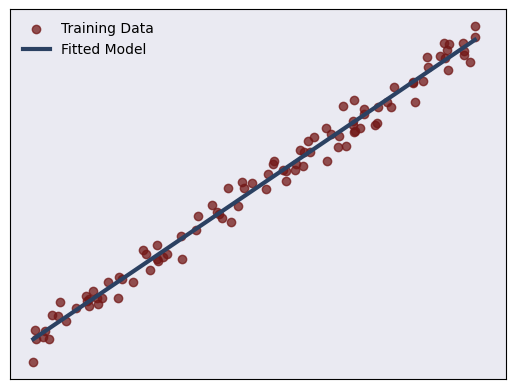

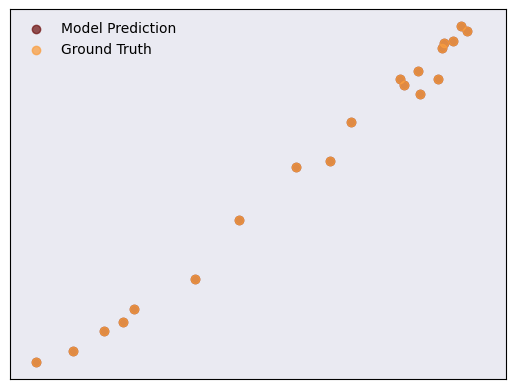

R2 Score: 0.9867210507236713


In [9]:
X, Y = load_csv_in_sklearn_format( "linear_dataset_100.csv" )

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

plot_model_fit( X, Y, X_trend=X, Y_trend=Y_pred, filename="goodfit_linear_model.png" )

X_test, Y_ground_truth = load_csv_in_sklearn_format( "linear_dataset_test.csv" )

Y_pred_test = Y_ground_truth

plot_test_data( X_test, Y_pred_test, X_test, Y_ground_truth, filename="goodfit_linear_testdata.png" )

r2_score = model.score(X, Y)
print( "R2 Score:", r2_score )

## Underfitting

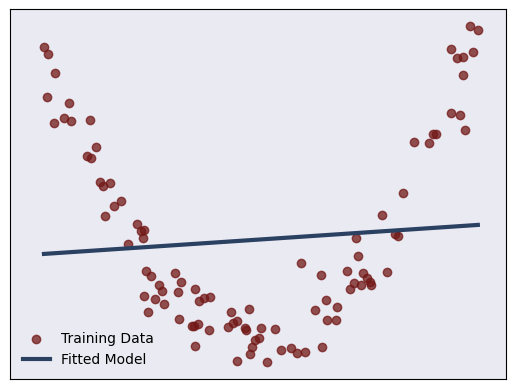

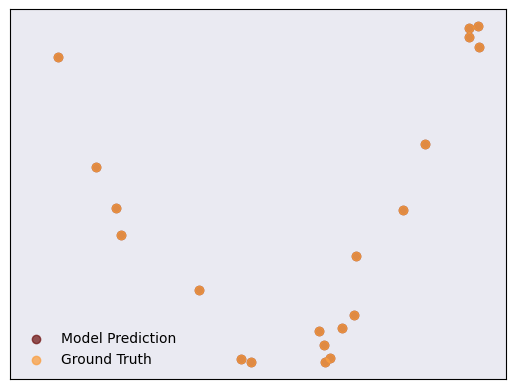

R2 Score: 0.007733215517661152


In [10]:
X, Y = load_csv_in_sklearn_format( "non_linear_dataset_100.csv" )

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

plot_model_fit( X, Y, X, Y_pred, filename="underfit_linear_model.png" )

X_test, Y_ground_truth = load_csv_in_sklearn_format( "non_linear_dataset_test.csv" )
Y_pred_test = Y_ground_truth

plot_test_data( X_test, Y_pred_test, X_test, Y_ground_truth, filename="underfit_linear_testdata.png" )

r2_score = model.score(X, Y)
print( "R2 Score:", r2_score )

## Polynomial Regression

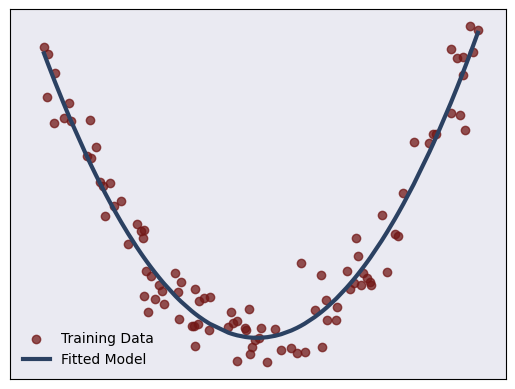

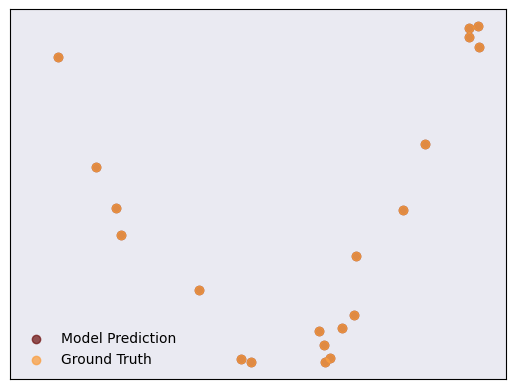

R2 Score: 0.9415334837789632


In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import make_pipeline

X, Y = load_csv_in_sklearn_format( "non_linear_dataset_100.csv" )

poly_features = PolynomialFeatures(degree=2, include_bias=False)
model = make_pipeline(poly_features, LinearRegression())
model.fit(X, Y)

Y_pred = model.predict(X)

plot_model_fit( X, Y, X, Y_pred, filename="goodfit_polynomial_model.png" )

X_test, Y_ground_truth = load_csv_in_sklearn_format( "non_linear_dataset_test.csv" )

Y_pred_test = Y_ground_truth

plot_test_data( X_test, Y_pred_test, X_test, Y_ground_truth, filename="goodfit_polynomial_testdata.png" )

r2_score = model.score(X, Y)
print( "R2 Score:", r2_score )

## Piecewise Polynomial

ValueError: x and y must have same first dimension, but have shapes (200,) and (10,)

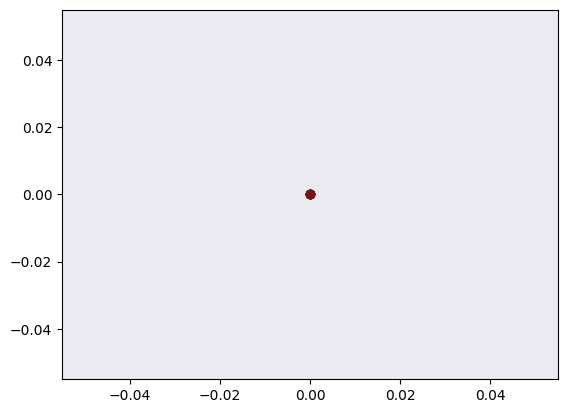

In [8]:
from scipy.interpolate import make_interp_spline

X_data, y_data = load_csv_in_sklearn_format( "non_linear_dataset_20.csv" )
x_data = [x[0] for x in X_data]
# please extend here

grid_x = numpy.linspace(-100, 100, 200)
evaluated_y = Y_to_replace

plot_model_fit( X_data, y_data, grid_x, evaluated_y, ylim=(-8500,8500), filename="overfit_spline_model.png" )

## Overfitting

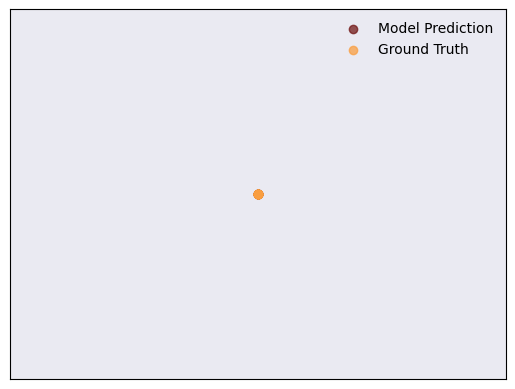

R2 Score: 0.0


In [ ]:
X_test, Y_ground_truth = load_csv_in_sklearn_format( "non_linear_dataset_test.csv" )

Y_pred_test = Y_to_replace
# please extend here

plot_test_data( X_test, Y_pred_test, X_test, Y_ground_truth, ylim=(-8500,8500), filename="overfit_spline_testdata.png" )

r2_score = 0.0
# please extend here

print( "R2 Score:", r2_score )